
# Mujeres en Tecnología

Análisis basado en la encuesta HackerRank Developer Survey 2018, realizada a desarrolladores de todo el mundo.

Fuente de los datos: Kaggle.com

### Sobre el Análisis

Este estudio busca explorar la participación de las mujeres en el sector tecnológico desde distintas dimensiones clave. A través de la comparación con sus pares masculinos, se pretende visibilizar las brechas existentes, identificar patrones de representación y destacar tanto los avances como los desafíos en materia de equidad de género dentro de la industria. Para ello, se abordan aspectos como la distribución por género en roles laborales y niveles jerárquicos, el uso y preferencia de lenguajes de programación, las diferencias en los métodos de aprendizaje, así como la experiencia y edad de inicio en la programación.

### Ejes de Análisis

1. Distribución de género en roles tecnológicos, niveles laborales e industrias
   - Analizar cómo se distribuyen mujeres y hombres en distintos puestos del sector tecnológico.
   - Observar la participación de cada género en diferentes niveles de seniority.
   - Evaluar la representación por género en las principales industrias que emplean perfiles tecnológicos.

2. Lenguajes de programación utilizados por género
   - Identificar los lenguajes de programación más utilizados por cada género.
   - Explorar la disposición a aprender nuevos lenguajes de programación.
   - Detectar posibles tendencias o preferencias según el género en el uso de determinados lenguajes.

3. Formación en programación y tecnología
   - Investigar los métodos de aprendizaje más comunes entre mujeres y hombres para adquirir habilidades en programación.
   - Analizar las edades de inicio en la programación según género, identificando posibles brechas de acceso temprano.

## 1. Inicialización

In [1]:
# Importar librerias
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
# Importar datasets 
data_values = pd.read_csv('files/dataset/archive/HackerRank-Developer-Survey-2018-Values.csv')

/var/folders/82/grjgs_q959j1pwfb817_nsl80000gn/T/ipykernel_20601/3690943798.py:4: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  data_values = pd.read_csv('files/dataset/archive/HackerRank-Developer-Survey-2018-Values.csv')


## 2. Visualización de datos

In [3]:
# Visualizar información del dataset
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25090 entries, 0 to 25089
Columns: 251 entries, RespondentID to q36Level4
dtypes: float64(4), int64(1), object(246)
memory usage: 48.0+ MB


In [4]:
# Visualizar el dataset
data_values.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap


El dataset tiene muchas columnas y no necesito todas para mi análisis, por lo tanto, voy a filtrar la data para extraer solo las columnas que me interesan.

### 2.2. Filtrar columnas en nuevo dataset

In [5]:
# Lista de columnas de interés
columnas_interes = [
    'RespondentID',
    'CountryNumeric2',
    'q1AgeBeginCoding',
    'q2Age',
    'q3Gender',
    'q4Education',
    'q5DegreeFocus',
    'q6LearnCodeUni',
    'q6LearnCodeSelfTaught',
    'q6LearnCodeAccelTrain',
    'q6LearnCodeOther',
    'q8JobLevel',
    'q8Student',
    'q9CurrentRole',
    'q10Industry',
    'q25LangJava',
    'q25LangPython',
    'q25LangJavascript',
    'q25Scala',
    'q25LangR',
    'q26FrameLearnAngularJS',
    'q26FrameLearnReact',
    'q26FrameLearnDjango',
    'q26FrameLearnNetCore',
    'q26FrameLearnNodeDotjs',
    'q28LoveJava',
    'q28LovePython',
    'q28LoveJavascript',
    'q28LoveScala',
    'q28LoveR',
    'q29FrameLoveAngularJS',
    'q29FrameLoveReact',
    'q29FrameLoveDjango',
    'q29FrameLoveNetCore',
    'q29FrameLoveNodeDotjs'
]

# Filtrar el dataframe
data_filtered = data_values[columnas_interes]


A partir de aquí, trabajaré con el nuevo dataset filtrado. 

## 2.3. Limpieza de datos

In [6]:
# Visualizar información de dataset filtrado
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25090 entries, 0 to 25089
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   RespondentID            25090 non-null  int64 
 1   CountryNumeric2         21099 non-null  object
 2   q1AgeBeginCoding        25090 non-null  object
 3   q2Age                   25090 non-null  object
 4   q3Gender                25090 non-null  object
 5   q4Education             25090 non-null  object
 6   q5DegreeFocus           23931 non-null  object
 7   q6LearnCodeUni          17432 non-null  object
 8   q6LearnCodeSelfTaught   17600 non-null  object
 9   q6LearnCodeAccelTrain   1832 non-null   object
 10  q6LearnCodeOther        489 non-null    object
 11  q8JobLevel              24133 non-null  object
 12  q8Student               10351 non-null  object
 13  q9CurrentRole           24090 non-null  object
 14  q10Industry             22570 non-null  object
 15  q2

Me interesa cambiar los nombres de las columnas para mejor comprensión.

#### 2.3.1. Cambiar nombres de columnas

In [7]:
# Lista con nuevos nombres de columnas
col_new_names = [
    'RespondentID',
    'Country',
    'AgeBeginCoding',
    'Age',
    'Gender',
    'Education',
    'DegreeFocus',
    'LearnCodeUni',
    'LearnCodeSelfTaught',
    'LearnCodeAccelTrain',
    'LearnCodeOther',
    'JobLevel',
    'Student',
    'CurrentRole',
    'Industry',
    'LangJava',
    'LangPython',
    'LangJavascript',
    'Scala',
    'LangR',
    'FrameLearnAngularJS',
    'FrameLearnReact',
    'FrameLearnDjango',
    'FrameLearnNetCore',
    'FrameLearnNodeDotjs',
    'LoveJava',
    'LovePython',
    'LoveJavascript',
    'LoveScala',
    'LoveR',
    'FrameLoveAngularJS',
    'FrameLoveReact',
    'FrameLoveDjango',
    'FrameLoveNetCore',
    'FrameLoveNodeDotjs'
]  

# Cambiar nombres de columnas 
data_filtered.columns = col_new_names

In [8]:
# Visualizar dataset con nuevos nombres de columnas
data_filtered.head()

,RespondentID,Country,AgeBeginCoding,Age,Gender,Education,DegreeFocus,LearnCodeUni,LearnCodeSelfTaught,LearnCodeAccelTrain,...,LoveJava,LovePython,LoveJavascript,LoveScala,LoveR,FrameLoveAngularJS,FrameLoveReact,FrameLoveDjango,FrameLoveNetCore,FrameLoveNodeDotjs
0,6464453728,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,Computer Science,School or university,"Self-taught (i.e. books, online)",NaN,...,Love,Hate,Love,Hate,Love,Hate,Hate,Hate,Hate,Hate
1,6478031510,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",School or university,"Self-taught (i.e. books, online)",NaN,...,Love,NaN,Hate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6464392829,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,"Other STEM (science, technology, engineering, ...",School or university,NaN,Accelerated training (i.e. bootcamp),...,Love,Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6481629912,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,Computer Science,NaN,"Self-taught (i.e. books, online)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6488385057,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,School or university,"Self-taught (i.e. books, online)",NaN,...,NaN,NaN,Love,NaN,NaN,NaN,NaN,NaN,NaN,Love


#### 2.3.2. Revisar valores duplicados

In [9]:
# Revisar valores duplicados en columna de IDs
data_filtered['RespondentID'].duplicated().sum()

np.int64(0)

In [10]:
# Revisar duplicados en todo el dataset
data_filtered.duplicated().sum()

np.int64(0)

No hay valores duplicados

#### 2.3.3. Revisar valores nulos

In [11]:
# Revisar valores nulos
data_filtered.isna().sum()

RespondentID               0
Country                 3991
AgeBeginCoding             0
Age                        0
Gender                     0
Education                  0
DegreeFocus             1159
LearnCodeUni            7658
LearnCodeSelfTaught     7490
LearnCodeAccelTrain    23258
LearnCodeOther         24601
JobLevel                 957
Student                14739
CurrentRole             1000
Industry                2520
LangJava                3847
LangPython              3440
LangJavascript          4695
Scala                  16921
LangR                  15862
FrameLearnAngularJS     9985
FrameLearnReact        11757
FrameLearnDjango       15020
FrameLearnNetCore      17941
FrameLearnNodeDotjs    10815
LoveJava                5982
LovePython              7735
LoveJavascript          9595
LoveScala              20070
LoveR                  19680
FrameLoveAngularJS     13149
FrameLoveReact         15867
FrameLoveDjango        18071
FrameLoveNetCore       19037
FrameLoveNodeD

Hay bastantes valores nulos, sin embargo puede deberse a que las respuestas corresponden a diferentes cosas y no necesariamente un encuestado debe responder todas. Voy a verlo mas en detalle.

In [12]:
# Ver los datos nulos en 'pais'
data_filtered[data_filtered['Country'].isna()]

,RespondentID,Country,AgeBeginCoding,Age,Gender,Education,DegreeFocus,LearnCodeUni,LearnCodeSelfTaught,LearnCodeAccelTrain,...,LoveJava,LovePython,LoveJavascript,LoveScala,LoveR,FrameLoveAngularJS,FrameLoveReact,FrameLoveDjango,FrameLoveNetCore,FrameLoveNodeDotjs
4,6488385057,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,School or university,"Self-taught (i.e. books, online)",NaN,...,NaN,NaN,Love,NaN,NaN,NaN,NaN,NaN,NaN,Love
13,6479308588,NaN,26 - 30 years old,25 - 34 years old,Female,Some college,"Other STEM (science, technology, engineering, ...",NaN,"Self-taught (i.e. books, online)",Accelerated training (i.e. bootcamp),...,Love,NaN,Hate,NaN,NaN,NaN,Hate,NaN,NaN,NaN
15,6467287018,NaN,11 - 15 years old,18 - 24 years old,Female,"Some post graduate work (Masters, PhD)","Other STEM (science, technology, engineering, ...",School or university,"Self-taught (i.e. books, online)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,6461750599,NaN,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,NaN,"Self-taught (i.e. books, online)",NaN,...,Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,6464588056,NaN,21 - 25 years old,25 - 34 years old,Male,High school graduate,Computer Science,School or university,NaN,NaN,...,NaN,Hate,Hate,NaN,NaN,NaN,NaN,NaN,Love,Love
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25085,6490801288,NaN,16 - 20 years old,18 - 24 years old,Male,College graduate,Computer Science,NaN,"Self-taught (i.e. books, online)",NaN,...,Love,Hate,Love,Hate,Hate,NaN,NaN,NaN,NaN,NaN
25086,6490929806,NaN,11 - 15 years old,18 - 24 years old,Male,Some college,Computer Science,School or university,"Self-taught (i.e. books, online)",NaN,...,Love,Love,Love,Love,Love,NaN,NaN,NaN,NaN,NaN
25087,6489517004,NaN,5 - 10 years old,12 - 18 years old,Male,High school graduate,Computer Science,School or university,NaN,NaN,...,Love,Love,NaN,Love,NaN,Love,Love,NaN,NaN,Hate
25088,6489519290,NaN,16 - 20 years old,18 - 24 years old,Male,#NULL!,Computer Science,School or university,NaN,NaN,...,Love,Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Luego de analizar los valores ausentes, he decidido imputarlos rellenando con 'unknown', ya que no me interesa perder la información de las otras columnas donde si tienen datos, y en vista de que se trata de una encuesta, puede ser que los encuestados no llenaron todas las preguntas con la información corespondiente a cada item.

#### 2.3.3.1. Imputar valores nulos

In [13]:
# Rellenar valores nulos en el dataset 
data_filtered = data_filtered.fillna('Unknown')

In [14]:
# Revisar nuevamente si hay valores nulos luego de imputarlos
data_filtered.isna().sum()

RespondentID           0
Country                0
AgeBeginCoding         0
Age                    0
Gender                 0
Education              0
DegreeFocus            0
LearnCodeUni           0
LearnCodeSelfTaught    0
LearnCodeAccelTrain    0
LearnCodeOther         0
JobLevel               0
Student                0
CurrentRole            0
Industry               0
LangJava               0
LangPython             0
LangJavascript         0
Scala                  0
LangR                  0
FrameLearnAngularJS    0
FrameLearnReact        0
FrameLearnDjango       0
FrameLearnNetCore      0
FrameLearnNodeDotjs    0
LoveJava               0
LovePython             0
LoveJavascript         0
LoveScala              0
LoveR                  0
FrameLoveAngularJS     0
FrameLoveReact         0
FrameLoveDjango        0
FrameLoveNetCore       0
FrameLoveNodeDotjs     0
dtype: int64

Luego de visualizar el dataset después de rellenar valores nulos, he encontrado algunos valores representados como #NULL! en la columna 'Education', pero son un string y no son reconocidos como nulos. Así que los reemplezaré de igual modo con 'unknown'.

#### 2.3.4. Normalizar texto

In [15]:
import unicodedata
import re

# Definir función de normalización de texto
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.strip()
        
        # Reemplazar valores vacíos comunes por 'unknown'
        if text in ['null', '#null!', 'na', 'n/a', 'none', 'nan', 'undefined', 'missing']:
            return 'unknown'
        
        text = ''.join(c for c in unicodedata.normalize('NFD', text)
                       if unicodedata.category(c) != 'Mn')  # eliminar acentos
        text = re.sub(r'[^\w\s]', '', text)  # eliminar puntuación
        text = re.sub(r'\s+', ' ', text)  # quitar espacios duplicados
    return text


In [16]:
# Aplicar funcion de normalizacion en el dataset 

# Hacer una lista de las columnas en el dataset 
columns_list = data_filtered.columns.tolist()


for col in columns_list:
    if data_filtered[col].dtype == "object" or data_filtered[col].dtype.name == "string":
        data_filtered[col] = data_filtered[col].apply(normalize_text)

Ahora que normalice el texto, quiero quitar de las columnas de edades, la frase 'years old'

In [17]:
# Eliminar 'years old' de las columnas de edad
cols = ['AgeBeginCoding', 'Age']

for col in cols:
    data_filtered[col] = data_filtered[col].str.replace('years old', '', regex=False).str.strip()


Me parece que el dataset está listo para comenzar a explorarlo.

## 3. EDA

## 3.1. Desequilibrio de clases

In [18]:
# Revisar el desequilibrio de clases
data_filtered['Gender'].value_counts()

Gender
male         20774
female        4122
nonbinary      125
unknown         69
Name: count, dtype: int64

Veo un gran desequilibro de clases entre el género femenino y masculino. Para efectos de mi análisis, no incluiré 'no binarios' ni 'desconocido'.
En vista del desequilibrio de clases, he decidido segmentar los datos por género y evaluarlos por separado para comparar porcentajes y no valores absolutos.

## 3.2. Segmentar la poblacion por género

In [19]:
# Segmentar el dataset por genero
data_female = data_filtered[data_filtered['Gender']=='female']
data_male = data_filtered[data_filtered['Gender']=='male']

## 3.3. Distribución por género según nivel laboral, roles tecnológicos e industrias 

### 3.3.1. Distribución de géneros en distintos niveles laborales
   - Visualizar cómo se distribuyen mujeres y hombres en varios niveles laborales

In [20]:
## --------------------- Mujeres -----------------------------------------

# Contar ocurrencias por nivel laboral distintos a 'desconocido' y 'estudiante'
job_level_female_rate = data_female['JobLevel'].value_counts(normalize=True).mul(100).drop(['unknown', 'student'], axis=0).round(1)

## -------------------- Hombres -----------------------------

# Contar ocurrencias por nivel laboral distintos a 'desconocido' y 'estudiante'
job_level_male_rate = data_male['JobLevel'].value_counts(normalize=True).mul(100).drop(['unknown', 'student'], axis=0).round(1)


## -------------- Comparar ambos grupos --------------------------------

# Unir en un dataframe
job_level_comparison = pd.DataFrame({
    'Female': job_level_female_rate,
    'Male': job_level_male_rate
}).fillna(0)

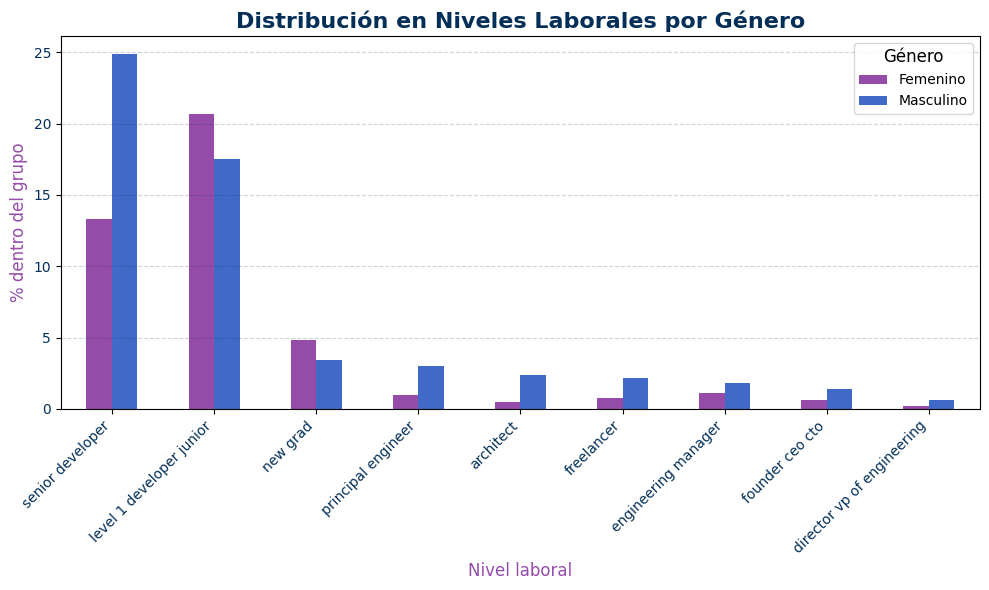

In [108]:
# Colores de la paleta
colors = ['#954CA9', '#416AC8', '#022E57']

# Crear gráfico para comparar ambos grupos
ax = job_level_comparison.sort_values(by='Male', ascending=False).plot(
    kind='bar', figsize=(10, 6), color=colors
)

# Personalización del gráfico
plt.title('Distribución en Niveles Laborales por Género', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Nivel laboral', fontsize=12, color='#954CA9')
plt.ylabel('% dentro del grupo', fontsize=12, color='#954CA9')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Agregar leyenda
plt.legend(title='Género', title_fontsize=12, fontsize=10, loc='upper right', labels=['Femenino', 'Masculino'])

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### Conclusiones acerca de la distribución por género en distintos niveles laborales

La tasa más alta de mujeres se concentra en un nivel laboral junior, con un 21% aproximadamente, mientras que los hombres en niveles junior tienen alredor de 18%.
Por otra parte, hay apenas un 13% de mujeres en niveles senior, dentro del grupo encuestado, mientras que los hombres alcanzan un 25% en el mismo nivel senior, lo cual es una diferencia bastante alta. 

Esto pudiera indicar también diferencias salariales, ya que los niveles senior suelen percibir mayores ingresos que los niveles junior.

Senior y Junior son los niveles más destacados de la visualización.

### 3.3.2. Distribución de género en roles tecnológicos

   - Visualizar cómo se distribuyen mujeres y hombres en diferentes puestos dentro del sector tech.

In [22]:
## -------------------- Mujeres -------------------------------------- 

# Contar ocurrencias por rol distintos a 'desconocido'
women_roles_rate = data_female['CurrentRole'].value_counts(normalize=True).mul(100).drop('unknown' , axis=0).round(1)


## -------------------- Hombres -----------------------------

# Contar ocurrencias por rol distintos a 'desconocido'
men_roles_rate = data_male['CurrentRole'].value_counts(normalize=True).mul(100).drop('unknown' , axis=0).round(1)


## -------------- Comparar ambos grupos --------------------------------

# Unir en un dataframe
roles_comparison = pd.DataFrame({
    'Female': women_roles_rate,
    'Male': men_roles_rate
}).fillna(0)

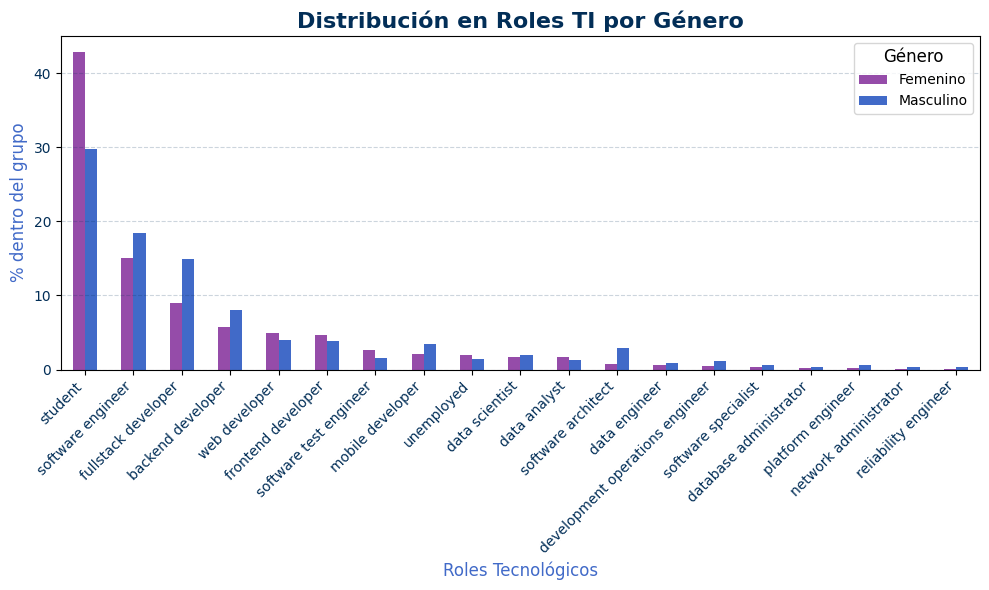

In [93]:
# Crear gráfico para ambos géneros

# Colores de la paleta actualizada
colors = ['#954CA9', '#416AC8', '#022E57']  # Violeta, azul medio, azul oscuro

# Crear gráfico para comparar ambos grupos
ax = roles_comparison.sort_values(by='Female', ascending=False).plot(
    kind='bar', figsize=(10, 6), color=colors
)

# Personalización del gráfico
plt.title('Distribución en Roles TI por Género', fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Roles Tecnológicos', fontsize=12, color='#416AC8')
plt.ylabel('% dentro del grupo', fontsize=12, color='#416AC8')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Agregar leyenda personalizada
plt.legend(title='Género', title_fontsize=12, fontsize=10, loc='upper right', labels=['Femenino', 'Masculino'])

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


### Algunas conclusiones: distribución de género en roles tecnológicos

En los tres roles principales más populares, los hombres tienen mayor distrubución que las mujeres: 
   - Sofware engineer (3% + aprox.)
   - Fullstack developer (6% + aprox.)
   - Backend developer (2% + aprox.)

Roles en los que las mujeres tienen mayor distrubción que los hombres (sin embargo, superan en muy pequeña proporción):
   - Web developer (1% +)
   - Frontend developer (1 % +)
   - Software test engineer (menos de 1% +)
   - Data Analyst (1% +)


   Hay un porcentaje mayor de mujeres estudiantes, 45%, frente a un 31% de hombres.

### 3.3.3. Principales industrias y participación por género

   - Examinar las industrias principales donde desempeñan roles tecnológicos y la distribución por género.

In [24]:
## --------------------- Mujeres -----------------------------------------

# Contar ocurrencias por industria distintas a 'desconocido' 
industry_female_dis = data_female['Industry'].value_counts(normalize=True).mul(100).drop('unknown' , axis=0).round(1)


## -------------------- Hombres -----------------------------

# Contar ocurrencias por industria distintas a 'desconocido'
industry_male_dis = data_male['Industry'].value_counts(normalize=True).mul(100).drop('unknown' , axis=0).round(1)


## -------------- Comparar ambos grupos --------------------------------

# Unir en un dataframe
industry_dis_comparison = pd.DataFrame({
    'Female': industry_female_dis,
    'Male': industry_male_dis
}).fillna(0)

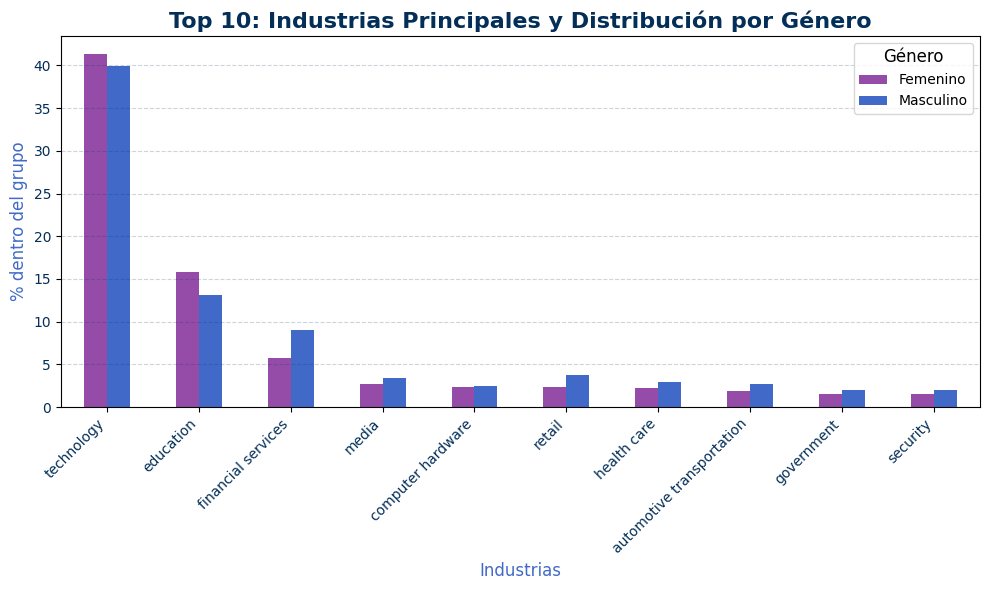

In [94]:
# Crear gráfico para ambos géneros

# Colores actualizados
colors = ['#954CA9', '#416AC8', '#022E57']  # Violeta, azul medio, azul oscuro

# Crear gráfico para comparar ambos grupos
ax = industry_dis_comparison.sort_values(by='Female', ascending=False).head(10).plot(
    kind='bar', figsize=(10, 6), color=colors
)

# Personalización del gráfico
plt.title('Top 10: Industrias Principales y Distribución por Género', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Industrias', fontsize=12, color='#416AC8')
plt.ylabel('% dentro del grupo', fontsize=12, color='#416AC8')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Agregar leyenda
plt.legend(title='Género', title_fontsize=12, fontsize=10, loc='upper right', labels=['Femenino', 'Masculino'])

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### Conclusiones acerca de la participación por género dentro de las 10 principales industrias 

 - Dentro de la industria tecnológica, tenemos un 41% de particpación femenina desempeñando cargos TI, frente al casi 40% de partcipación masculina.
 - En áera de educación, también tenemos una mayor proporción de partcipación femenina, con casi un 16%, mientras que los hombres tienen un 13%.
 - Por otra parte, en la industria de servicios financieros, los hombres tienen mayor participación, con un 9%, mientras que las muejres alcanzan casi un 6%.
 - En cuanto al resto de las industrias, no hay grandes diferencias.


## 3.4. Lenguajes de programación más usados por género

   - Examinar si existen preferencias o tendencias de uso de ciertos lenguajes según género.

### 3.4.1. ¿Cúales lenguajes de programación utilizan más ambos géneros?

   - Estoy evaluando 5 lenguajes de programación: Java, JavaScript, Python, Scala, R

In [26]:
## -------------------- Mujeres ----------------- 

# Filtrar columnas que comienzan con 'Lang' 
lang_columns = [col for col in data_female.columns if col.startswith(('Lang', 'Scala'))]

# Crear un nuevo DataFrame con esas columnas
lang_used_for_women = data_female[lang_columns]

# Calcular la tasa de programas que saben utilizar las mujeres
lang_used_for_women = lang_used_for_women.apply(lambda col: col.value_counts(normalize=True) * 100).drop('unknown', axis=0).round(1)


## -------------------- Hombres --------------------------------

# Filtrar columnas que comienzan con 'Lang' 
lang_columns = [col for col in data_male.columns if col.startswith(('Lang', 'Scala'))]

# Crear un nuevo DataFrame con esas columnas
lang_used_for_men = data_male[lang_columns]

# Calcular la tasa de programas que saben utilizar las mujeres
lang_used_for_men = lang_used_for_men.apply(lambda col: col.value_counts(normalize=True) * 100).drop('unknown', axis=0).round(1)


## ---------------- Comparar ambos grupos -----------------------

# Unir en un dataframe
lang_comparison = pd.DataFrame({
    'Female': lang_used_for_women.loc['know'],
    'Male': lang_used_for_men.loc['know']
})

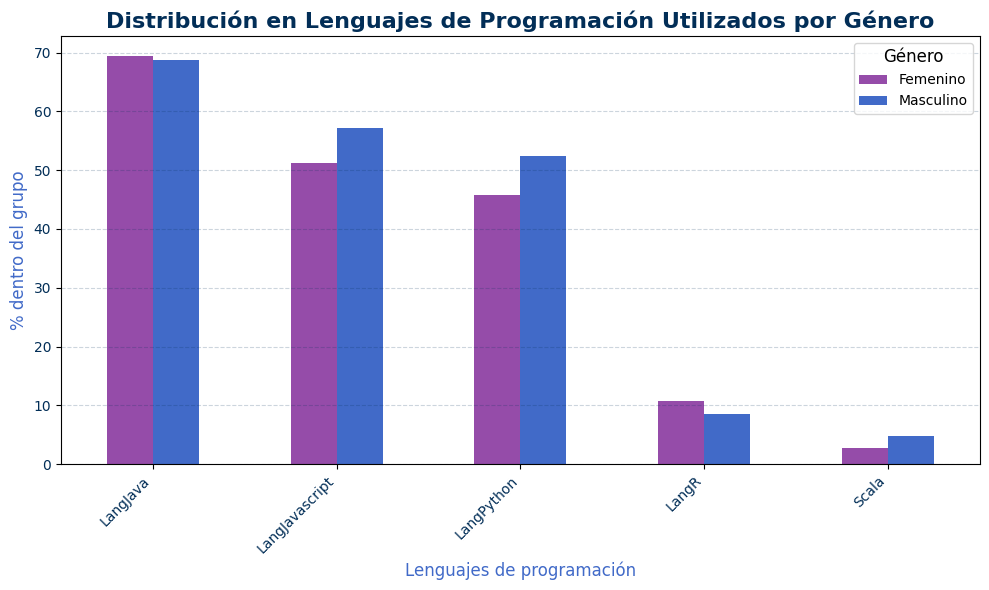

In [95]:
# Crear gráfico para ambos grupos

# Colores actualizados
colors = ['#954CA9', '#416AC8', '#022E57']  # Violeta, azul medio, azul oscuro

# Configurar gráfico para ambos grupos
ax = lang_comparison.sort_values(by='Female', ascending=False).plot(
    kind='bar', figsize=(10, 6), color=colors
)

# Personalización del gráfico
plt.title('Distribución en Lenguajes de Programación Utilizados por Género', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Lenguajes de programación', fontsize=12, color='#416AC8')
plt.ylabel('% dentro del grupo', fontsize=12, color='#416AC8')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Agregar leyenda
plt.legend(title='Género', title_fontsize=12, fontsize=10, loc='upper right', labels=['Femenino', 'Masculino'])

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()



#### Algunas conlusiones sobre los lenguajes de programación usados por ambos géneros 

EL lenguaje más utilizado por mujeres (top 1) es Java, donde superan por un mínimo porcentaje a los hombres. 
Por otro lado, hay un porcentaje mayor de hombres que saben programar con Javascrip y Python.


La tendencia de apredizaje de lenguajes de programación creo que se relaciona con los roles principales. Java y JavaScript son más utilizados en el top tres de roles principales vistos anteriormente.

### 3.4.2. Disposición de aprender lenguajes de programación en ambos grupos

In [28]:
## --------------- Comparar ambos grupos ------------

# Unir en un dataframe
lang_will_learn_comparison = pd.DataFrame({
    'Female': lang_used_for_women.loc['will learn'],
    'Male': lang_used_for_men.loc['will learn']
})

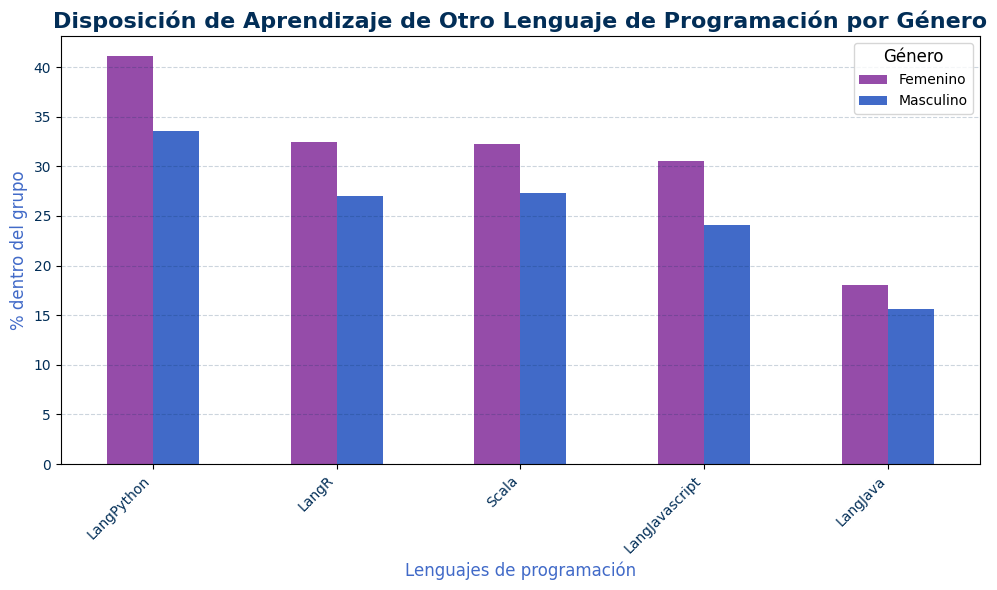

In [96]:
# Crear gráfico

# Colores actualizados
colors = ['#954CA9', '#416AC8', '#022E57']  # Violeta, azul medio, azul oscuro

# Configurar gráfico para ambos grupos
ax = lang_will_learn_comparison.sort_values(by='Female', ascending=False).plot(
    kind='bar', figsize=(10, 6), color=colors
)

# Personalización del gráfico
plt.title('Disposición de Aprendizaje de Otro Lenguaje de Programación por Género', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Lenguajes de programación', fontsize=12, color='#416AC8')
plt.ylabel('% dentro del grupo', fontsize=12, color='#416AC8')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Agregar leyenda
plt.legend(title='Género', title_fontsize=12, fontsize=10, loc='upper right', labels=['Femenino', 'Masculino'])

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()



#### Cerca del 40% de mujeres encuestadas desea aprender Python como lenguaje de programación, siendo que Python está en tercer lugar de los lenguajes aprendidos por mujeres.

### 3.4.3. Preferencias de lenguajes de programación por género

In [30]:
## ------------------- Mujeres -------------------------

# Filtrar columnas que comienzan con 'Love' 
love_columns = [col for col in data_female.columns if col.startswith('Love')]

# Crear un nuevo DataFrame con esas columnas
love_lang_for_women = data_female[love_columns]

# Calcular la tasa de programas que aman/odian utilizar las mujeres
love_lang_for_women = love_lang_for_women.apply(lambda col: col.value_counts(normalize=True) * 100).drop('unknown', axis=0).round(1)


## ----------------------- Hombres ---------------------------

# Crear un nuevo DataFrame con columnas filtradas
love_lang_for_men = data_male[love_columns]

# Calcular la tasa de programas que aman/odian utilizar las mujeres
love_lang_for_men = love_lang_for_men.apply(lambda col: col.value_counts(normalize=True) * 100).drop('unknown', axis=0).round(1)


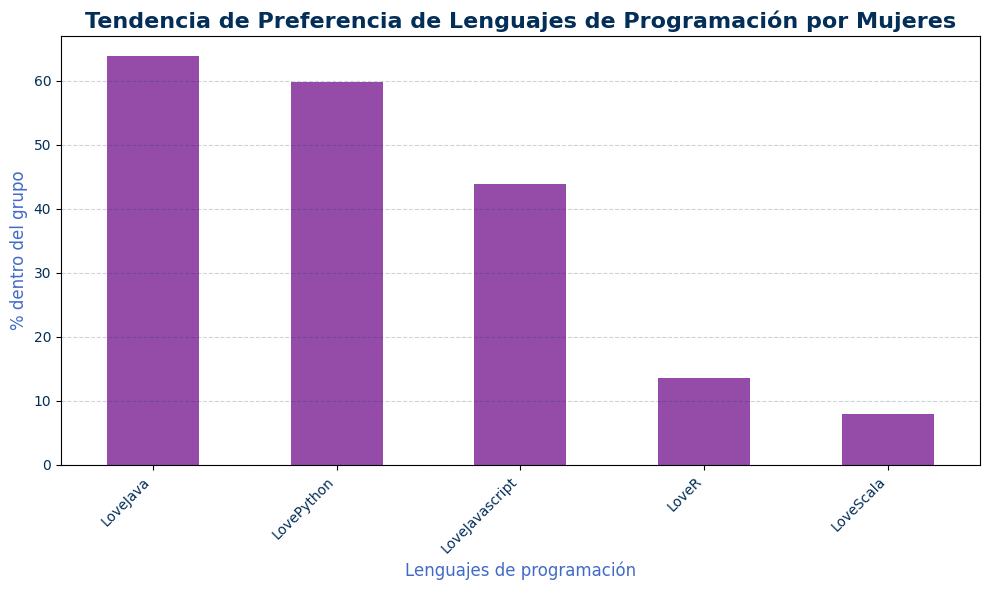

In [106]:
# Crear gráfico

# Color actualizado para mujeres
color_female = '#954CA9'  

# Configurar gráfico para mujeres
ax = love_lang_for_women.loc['love'].sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 6), color=color_female
)

# Personalización del gráfico
plt.title('Tendencia de Preferencia de Lenguajes de Programación por Mujeres', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Lenguajes de programación', fontsize=12, color='#416AC8')
plt.ylabel('% dentro del grupo', fontsize=12, color='#416AC8')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


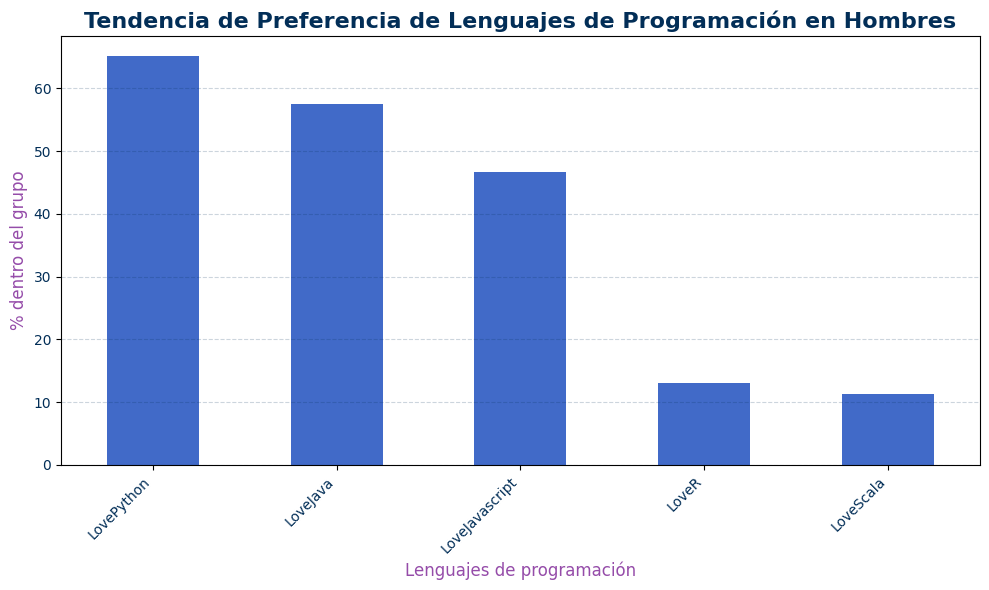

In [107]:
# Crear gráfico

# Color actualizado para hombres
color_male = '#416AC8' 

# Configurar gráfico para hombres
ax = love_lang_for_men.loc['love'].sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 6), color=color_male
)

# Personalización del gráfico
plt.title('Tendencia de Preferencia de Lenguajes de Programación en Hombres', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Lenguajes de programación', fontsize=12, color='#954CA9')
plt.ylabel('% dentro del grupo', fontsize=12, color='#954CA9')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


### ¿Cúal es la tendencia?
- Las mujeres prefieren Java en primer lugar y Python en segundo
- Los hombres prefieren Python en primer lugar y Java en segundo

## 3.5. Educación en áreas de programación
   - Evaluar cómo aprender a programar ambos géneros.
   - Estoy evaluando si aprender a programar en universidades, en bootcamps o programas y aprendizaje intensivos o si son autodidactas.

### 3.5.1. ¿Qué medios de aprendizaje de programación utiliza cada género?

In [33]:
# Definir funcion para obtener la tasa segun metodo de aprendizaje
def obtener_porcentaje(columna):
    return columna.value_counts(normalize=True) \
                  .mul(100) \
                  .round(1) \
                  .drop(labels='unknown', errors='ignore')

# Crear un diccionario para filtrar las columnas de aprendizaje de codigo
metodos_aprendizaje = {
    'Autodidacta': 'LearnCodeSelfTaught',
    'Universidad': 'LearnCodeUni',
    'Bootcamp': 'LearnCodeAccelTrain'
}

## ------------ Mujeres -------------------

# Obtener los porcentajes de mujeres 
porcentajes_female = {
    metodo: obtener_porcentaje(data_female[col])
    for metodo, col in metodos_aprendizaje.items()
}

## ------------- Hombres -------------------

# Obtener los porcentajes de hombres
porcentajes_male = {
    metodo: obtener_porcentaje(data_male[col])
    for metodo, col in metodos_aprendizaje.items()
}


## ------------- Comparar ambos grupos ---------------

# Crear un Df para ambos generos
learn_coding_rate = pd.DataFrame({
    'Female': [porcentajes_female[metodo].iloc[0] if not porcentajes_female[metodo].empty else 0 for metodo in metodos_aprendizaje],
    'Male': [porcentajes_male[metodo].iloc[0] if not porcentajes_male[metodo].empty else 0 for metodo in metodos_aprendizaje]
}, index=metodos_aprendizaje.keys())

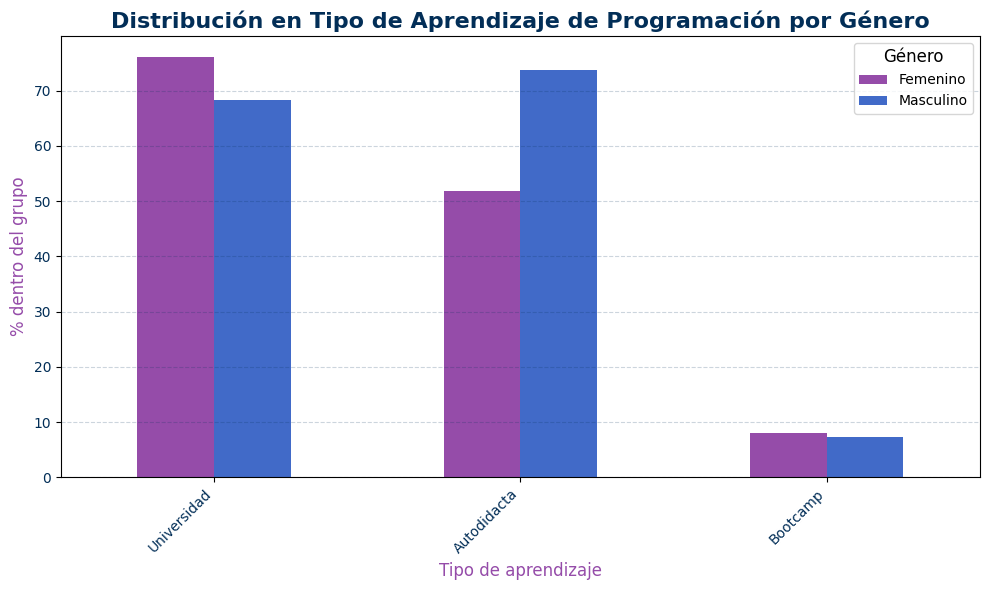

In [101]:
# Colores de la paleta
colors = ['#954CA9', '#416AC8', '#022E57']

# Configurar gráfico para ambos grupos
ax = learn_coding_rate.sort_values(by='Female', ascending=False).plot(kind='bar', figsize=(10, 6), color=colors)

# Personalización del gráfico
plt.title('Distribución en Tipo de Aprendizaje de Programación por Género', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Tipo de aprendizaje', fontsize=12, color='#954CA9')
plt.ylabel('% dentro del grupo', fontsize=12, color='#954CA9')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Agregar leyenda
plt.legend(title='Género', title_fontsize=12, fontsize=10, loc='upper right', labels=['Femenino', 'Masculino'])

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### ¿Cómo aprenden a programar mujeres y hombres?

   - Del grupo de mujeres encuestadas, cerca del 76% aprende a programar en universidades, cerca del 50% son autodidactas y un 8% aprende mediante bootcamps y entrenamiento acelerado.

   - Por otro lado, del grupo de hombres encuestados, cerca del 74% aprende a programar de manera autodidacta, el 68% aprende en universidades y el 7% aprende mediante bootcamps.

Interesante, la mujeres aprenden más estudiando programación en la universidad, mientras que los hombres aprenden más de manera autodidacta.

### 3.5.2. ¿A qué edad aprenden a progamar ambos géneros?

   - Visualizar grupos de edad en que ambos géneros comienzan a programas.

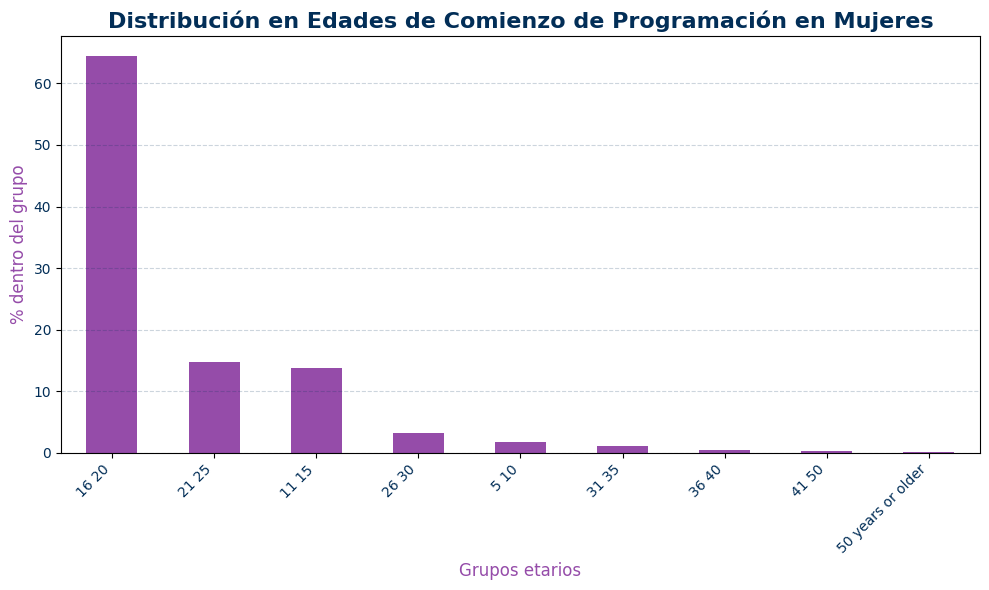

In [109]:
# Colores de la paleta
colors = ['#954CA9', '#416AC8', '#022E57']

# Crear gráfico para grupo de mujeres
ax = data_female['AgeBeginCoding'].value_counts(normalize=True).mul(100).round(1).drop(labels='unknown', errors='ignore').plot(
    kind='bar', figsize=(10, 6), color=colors[0]  # Usando el primer color de la paleta
)

# Personalización del gráfico
plt.title('Distribución en Edades de Comienzo de Programación en Mujeres', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Grupos etarios', fontsize=12, color='#954CA9')
plt.ylabel('% dentro del grupo', fontsize=12, color='#954CA9')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


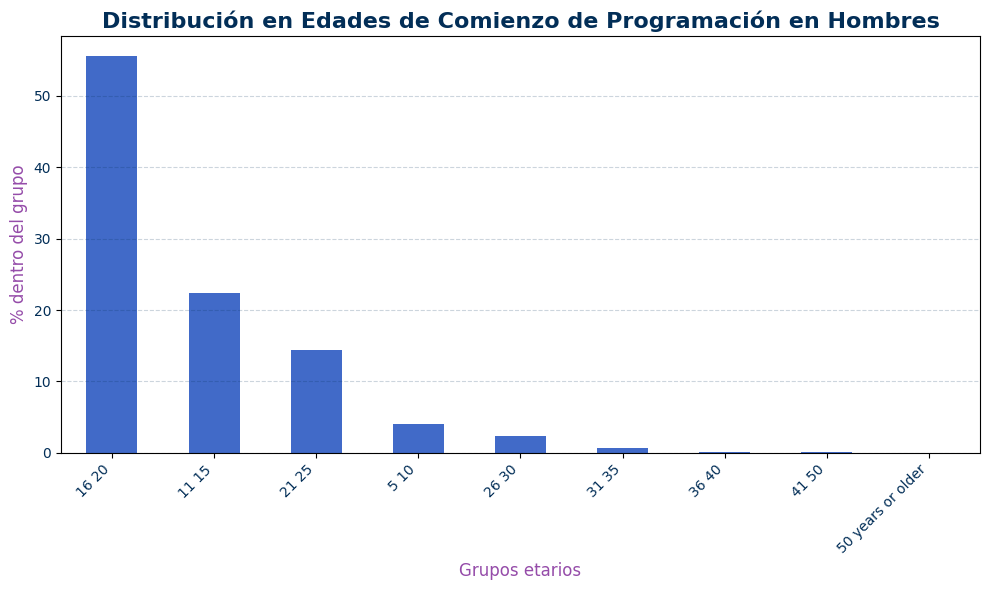

In [110]:
# Colores de la paleta
colors = ['#954CA9', '#416AC8', '#022E57']

# Crear gráfico para grupo de hombres
ax = data_male['AgeBeginCoding'].value_counts(normalize=True).mul(100).round(1).drop(labels='unknown', errors='ignore').plot(
    kind='bar', figsize=(10, 6), color=colors[1]  # Usando el segundo color de la paleta
)

# Personalización del gráfico
plt.title('Distribución en Edades de Comienzo de Programación en Hombres', 
          fontsize=16, fontweight='bold', color='#022E57')
plt.xlabel('Grupos etarios', fontsize=12, color='#954CA9')
plt.ylabel('% dentro del grupo', fontsize=12, color='#954CA9')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#022E57')
plt.yticks(fontsize=10, color='#022E57')

# Añadir líneas horizontales traslúcidas
ax.grid(axis='y', linestyle='--', color='#022E57', alpha=0.2)

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### Algunas conclusiones:

   - Tendencia en mujeres: la mayor parte de las mujeres (65%) comienza a programar entre los 16 y 20 años, luego tenemos un grupo de casi el 15% que aprende entre los 21 y 25 años y casi un 14% que comienza entre los 11 y 15 años de edad.

   - Tendencia en hombres: igual que las mujeres, cerca del 56% comienza a programar entres los 16 y 20 años, luego tenemos un grupo de casi 22% que empieza entre los  11 y 15 años y otrro grupo de 14% que comienza entre los 21 y 25 años.



### 4. Guardar los dataframes procesados utilizados para el análisis

In [37]:
# Definir una funcion para guardar archivos csv
import os

def guardar_varios_csv(lista_dataframes, lista_nombres, carpeta):
    """
    Guarda varios DataFrames como archivos CSV.

    Parámetros:
    - lista_dataframes: lista de DataFrames a guardar.
    - lista_nombres: lista de nombres (sin .csv) para los archivos.
    - carpeta: carpeta donde se guardarán los archivos (por defecto 'csv_guardados').
    """
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)

    for df, nombre in zip(lista_dataframes, lista_nombres):
        ruta = os.path.join(carpeta, f"{nombre}.csv")
        df.to_csv(ruta, index=False)
        print(f"Guardado: {ruta}")

In [39]:
# Hacer una lista de los dataframes que quiero guardar como archivos csv
data_to_save = [
    data_female,
    data_male,
    job_level_comparison,
    roles_comparison,
    industry_dis_comparison,
    lang_comparison,
    lang_will_learn_comparison,
    love_lang_for_women,
    learn_coding_rate
]


# Hacer una lista para nombres de los nuevos archivos
name_list = [
    'data_women',
    'data_men',
    'data_job_level_comparison',
    'data_roles_tech_comparison',
    'data_industry_distribution_comparison',
    'data_languages_comparison',
    'data_lang_to_learn_comparison',
    'data_lang_women_love',
    'data_learn_coding'
]

# Ruuta relativa de la carpeta nueva
carpeta_nueva = 'files/dataset/data_processed_csv'

In [40]:
# Guardar los archivos con la funcion
#guardar_varios_csv(data_to_save, name_list, carpeta_nueva)

Guardado: files/dataset/data_processed_csv/data_women.csv
Guardado: files/dataset/data_processed_csv/data_men.csv
Guardado: files/dataset/data_processed_csv/data_job_level_comparison.csv
Guardado: files/dataset/data_processed_csv/data_roles_tech_comparison.csv
Guardado: files/dataset/data_processed_csv/data_industry_distribution_comparison.csv
Guardado: files/dataset/data_processed_csv/data_languages_comparison.csv
Guardado: files/dataset/data_processed_csv/data_lang_to_learn_comparison.csv
Guardado: files/dataset/data_processed_csv/data_lang_women_love.csv
Guardado: files/dataset/data_processed_csv/data_learn_coding.csv


#### A continuación, se presentan las conclusiones de este análisis en el archivo: "Reporte-del-Analisis-Mujeres-en-Tecnologia", el cual se puede consultar en la misma carpeta donde se ubica el presente archivo, sin el código incluido.